# Regression
---

### 보스턴 주택 가격 예측

In [4]:
import pandas as pd
url = 'http://lib.stat.cmu.edu/datasets/boston'
df = pd.read_csv(url, sep=r'\s+', skiprows=22, header=None)
df

,0,1,2,3,4,5,6,7,8,9,10
0,0.00632,18.00,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3
1,396.90000,4.98,24.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.02731,0.00,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8
3,396.90000,9.14,21.60,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.02729,0.00,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8
...,...,...,...,...,...,...,...,...,...,...,...
1007,396.90000,5.64,23.90,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1008,0.10959,0.00,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0
1009,393.45000,6.48,22.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1010,0.04741,0.00,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0


In [9]:
import numpy as np

data = np.hstack([df.values[::2, :], df.values[1::2, :2]])
target = df.values[1::2, 2]
feature_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

df = pd.DataFrame(data, columns=feature_names)
df['PRICE'] = target
df.head()

ValueError: Shape of passed values is (506, 13), indices imply (506, 14)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1012 entries, 0 to 1011
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       1012 non-null   float64
 1   1       1012 non-null   float64
 2   2       1012 non-null   float64
 3   3       506 non-null    float64
 4   4       506 non-null    float64
 5   5       506 non-null    float64
 6   6       506 non-null    float64
 7   7       506 non-null    float64
 8   8       506 non-null    float64
 9   9       506 non-null    float64
 10  10      506 non-null    float64
dtypes: float64(11)
memory usage: 87.1 KB


In [15]:
pip install scikit-learn

  Using cached scipy-1.10.1-cp38-cp38-win_amd64.whl.metadata (58 kB)
  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached threadpoolctl-3.5.0-py3-none-any.whl.metadata (13 kB)
   ---------------------------------------- 0.0/9.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.3 MB ? eta -:--:--
   - -------------------------------------- 0.3/9.3 MB ? eta -:--:--
   -- ------------------------------------- 0.5/9.3 MB 837.5 kB/s eta 0:00:11
   --- ------------------------------------ 0.8/9.3 MB 859.5 kB/s eta 0:00:10
   ---- ----------------------------------- 1.0/9.3 MB 1.1 MB/s eta 0:00:08
   ------ --------------------------------- 1.6/9.3 MB 1.3 MB/s eta 0:00:07
   --------- ------------------------------ 2.1/9.3 MB 1.5 MB/s eta 0:00:05
   ----------- ---------------------------- 2.6/9.3 MB 1.6 MB/s eta 0:00:05
   ------------- -------------------------- 3.1/9.3 MB 1.7 MB/s

In [16]:
from sklearn.preprocessing import PolynomialFeatures

X = np.arange(4).reshape(2, 2)
print(X)

poly = PolynomialFeatures(degree=2)
poly.fit(X)
XX = poly.transform(X)
print(XX)

[[0 1]
 [2 3]]
[[1. 0. 1. 0. 0. 1.]
 [1. 2. 3. 4. 6. 9.]]


In [17]:
X = np.arange(4).reshape(2, 2)
y = 1 + 2 * X[:,0] + 3 * X[:,0]**2 + 4 * X[:,1]**3
print(X)
print(y)

[[0 1]
 [2 3]]
[  5 125]


In [18]:
poly = PolynomialFeatures(degree=3)
XX = poly.fit_transform(X)
print(XX)

[[ 1.  0.  1.  0.  0.  1.  0.  0.  0.  1.]
 [ 1.  2.  3.  4.  6.  9.  8. 12. 18. 27.]]


In [21]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(XX, y)
print(lr.intercept_)
print(lr.coef_)

1.7567567567567792
[0.         0.18018018 0.18018018 0.36036036 0.54054054 0.72072072
 0.72072072 1.08108108 1.62162162 2.34234234]


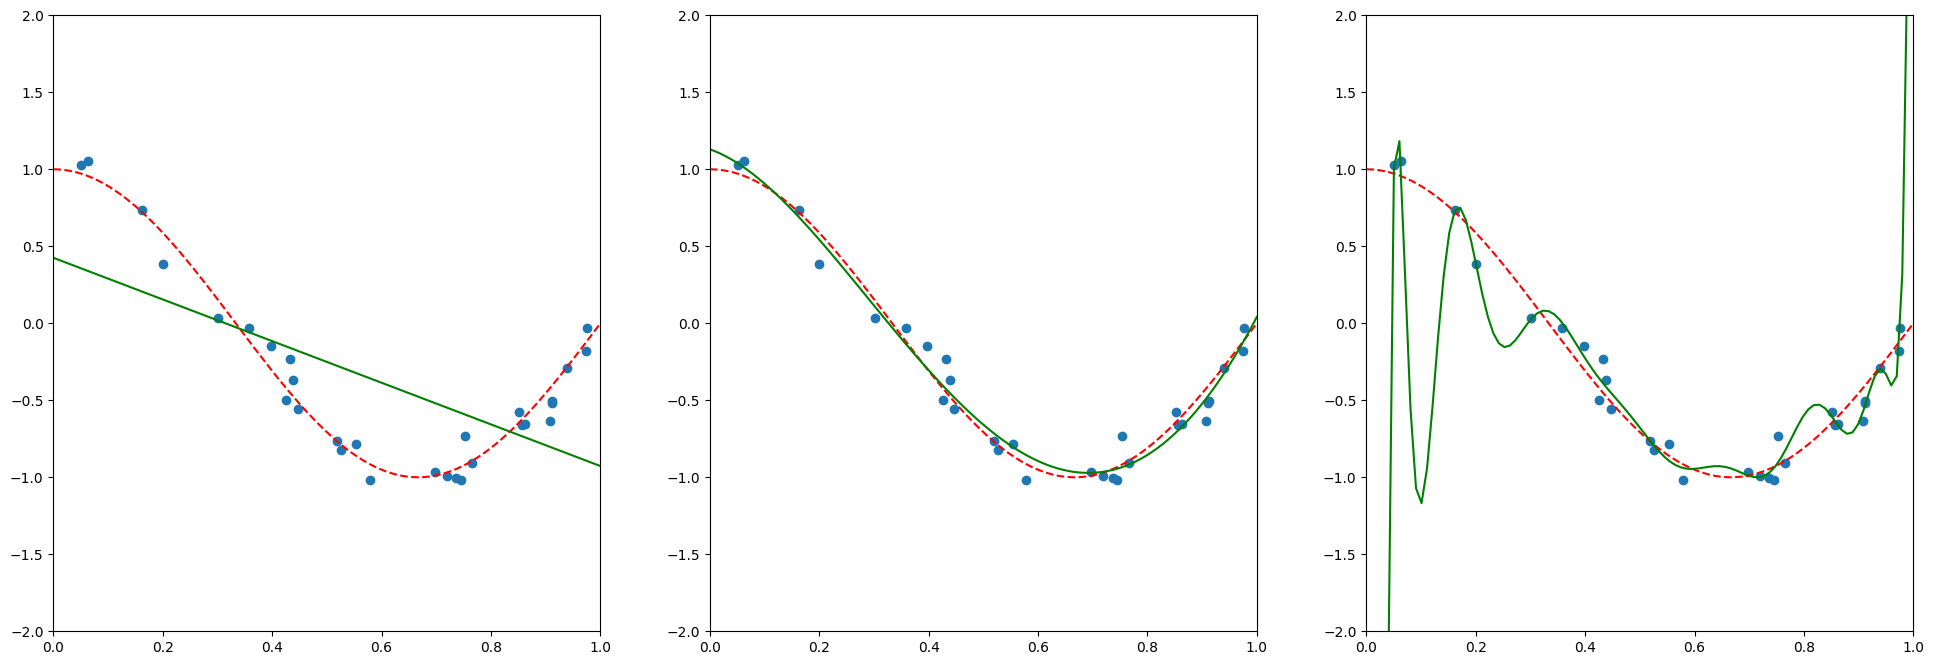

In [22]:
import matplotlib.pyplot as plt

def fn(X):
    return np.cos(1.5 * np.pi * X)

N = 30
X = np.sort(np.random.rand(N))
y = fn(X) + np.random.randn(N) * 0.1
X = X.reshape(-1, 1)

X_test = np.linspace(0, 1, 100).reshape(-1, 1)
y_test = fn(X_test)

fig, axs = plt.subplots(1, 3, figsize=(24,8))
degrees = [1, 4, 15]
for i, degree in enumerate(degrees):
    poly = PolynomialFeatures(degree=degree, include_bias=False)
    XX = poly.fit_transform(X)
    XX_test = poly.transform(X_test)

    lr = LinearRegression()
    lr.fit(XX, y)
    y_hat = lr.predict(XX_test)

    axs[i].scatter(X, y)
    axs[i].plot(X_test, y_test, 'r--')
    axs[i].plot(X_test, y_hat, 'g')
    axs[i].set_xlim(0, 1)
    axs[i].set_ylim(-2, 2)

### 릿지(Ridge) 회귀

In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

df = pd.DataFrame(data, columns=feature_names)
df['PRICE'] = target

y = df['PRICE']
X = df.drop(['PRICE'], axis=1)

lr = LinearRegression()
neg_mse = cross_val_score(lr, X, y, scoring='neg_mean_squared_error', cv=5)
rmse = np.sqrt(-1 * neg_mse)
avg_rmse = np.mean(rmse)

print(neg_mse)
print(rmse)
print(avg_rmse)

ValueError: Shape of passed values is (506, 13), indices imply (506, 14)

In [1]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures

def evaluate(X, y):
    alphas = [0.1, 1, 10, 100]
    for alpha in alphas:
        ridge = Ridge(alpha=alpha)
        neg_mse = cross_val_score(ridge, X, y, scoring='neg_mean_squared_error', cv=5)
        rmse = np.sqrt(-1 * neg_mse)
        avg_rmse = np.mean(rmse)
        print(alpha, avg_rmse)

evaluate(X, y)

XX = StandardScaler().fit_transform(X)
evaluate(XX, y)
XX = PolynomialFeatures(degree=2, include_bias=False).fit_transform(XX)
evaluate(XX, y)

XX = MinMaxScaler().fit_transform(X)
evaluate(XX, y)
XX = PolynomialFeatures(degree=2, include_bias=False).fit_transform(XX)
evaluate(XX, y)

XX = np.log1p(X)
evaluate(XX, y)

NameError: name 'X' is not defined

In [4]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
import numpy as np

cancer = load_breast_cancer()
X = StandardScaler().fit_transform(cancer.data)
y = cancer.target

evaluate(X, y)

lr = LogisticRegression()
neg_mse = cross_val_score(lr, X, y, scoring='neg_mean_squared_error', cv=5)
rmse = np.sqrt(-1 * neg_mse)
avg_rmse = np.mean(rmse)
print(avg_rmse)

0.1 0.25012821095391063
1 0.24952336232068953
10 0.2511857375348959
100 0.25940745011617816
0.13668428010257871


In [5]:
penalties = ['l2', 'l1']
Cs = [0.01, 0.1, 1, 5, 10]

for penalty in penalties:
    for c in Cs:
        lr = LogisticRegression(penalty=penalty, C=c, solver='liblinear')
        neg_mse = cross_val_score(lr, X, y, scoring='neg_mean_squared_error', cv=5)
        rmse = np.sqrt(-1 * neg_mse)
        avg_rmse = np.mean(rmse)
        print(c, avg_rmse)

0.01 0.1776694380161825
0.1 0.13076489894989773
1 0.14263791718743035
5 0.16747376747831605
10 0.16653927863057968
0.01 0.26876382922219577
0.1 0.15517654681982443
1 0.15267621366166087
5 0.18491038597121873
10 0.18491038597121873
